# Kaggle : New York City Taxi Trip Duration

<img src="taxi.png">

# 1 EDA (Exploratory Data Analysis)

# purpose of  EDA

- Suggest hypotheses about the causes of observed phenomena
- Assess assumptions on which statistical inference will be based
- Support the selection of appropriate statistical tools and techniques
- Provide a basis for further data collection through surveys or experiments

# EDA methods
- Graphical techniques used in EDA are:
    - boxplot 
        - detailed feature (datetime by month, day of week, hours)
    - historgram or barplot (distribution) # bin = range of value
        - origin feature (pick lat,long, drop lat, long, duration, passenger count, flag)
        - detailed feature (datetime by month, day of week, hours)
    - scatter plot
        - duration vs distance = to check odd data
    - Parallel Coordinates vs Colormaps vs Andrews curves charts
    - odd ratio????

- Quantative methods:
    - Trimean == tukey method?

# 1.1 Understanding data 

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
import ipyleaflet
from math import sin, cos, sqrt, atan2, radians
import folium
import folium.plugins as plugins
import os
from folium.plugins import MarkerCluster     # Map
from geographiclib.geodesic import Geodesic  # Map
import time, datetime                        # time data
import calendar
import scipy


%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
from sklearn.datasets import make_blobs

/home/jk/enter/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv("~/Documents/data/taxi_data/train.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
test = pd.read_csv("~/Documents/data/taxi_data/test.csv")
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [4]:
# test1 = pd.read_csv("~/Documents/data/taxi_data/test.csv")
# test1.head()

In [5]:
sample_submission = pd.read_csv("~/Documents/data/taxi_data/sample_submission.csv")
sample_submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


# 1.1.a Data type and unit

# unit

### 1. latitude / longtitude = decimal degree 
- 111.32mm per 0.000001° / 11.132 m per 0.0001° / 1.1132 km per 0.01° / 111.32 km per 1.0°

- ex) 40.767937 , -73.982155

### 2. datetime = year-month-day: hour-minute-second

### 3. vendor_id = 1, 2

### 4. passenger_count = 0,,,,9

### 4. store_and_fwd_flag = N, Y

### 6. duration = second
- ex) 455 sec = 7min 35sec


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null object
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [8]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 2 columns):
id               625134 non-null object
trip_duration    625134 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


# train data
-  1.4M data, 11 columns

# test data
-  0.6M data, 9 columns (no dropoff_datetime, trip_duration)

# sample_submission
-  0.6M data, 2 columns (id, trip_duration)

# New York border coordinate

In [9]:
# new york city coordinate = (41.145495, −73.994901)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# 1.1.b Missing Data check

In [10]:
#none of missing data
train2 = train.dropna(how = 'any')
test2 = test.dropna(how = 'any')
len(train) == len(train2), len(test) == len(test2)

(True, True)

# 1.1.c Trip duration calculation check

In [11]:
train["pickup_datetime"] =  pd.to_datetime(train["pickup_datetime"])
train["dropoff_datetime"] =  pd.to_datetime(train["dropoff_datetime"])
sample_duration = train["dropoff_datetime"] - train["pickup_datetime"]
sample_duration_sec = sample_duration.dt.total_seconds().astype('int')
train['trip_sec'] =  sample_duration_sec

In [12]:
train_d = train[train["trip_duration"] != train["trip_sec"]]
len(train_d)

0

# id trip != duration calcuation
id1864733
id0369307
id1325766
id0053347

In [13]:
# train[train.trip_duration > 100000]

### NYC Taxi Trip Duration [Train data]는

### 총 1,458,644 Row와 11 Column으로 구성되어 있으며,

### Missing Data는 존재하지 않습니다.

# 1.1.c Column information

- id : 개별 Taxi에 부여된 고유 id (이건 그냥 쓴거예요...)
- verdor_id : Taxi Company id >>>  1, 2로 구성되어 있는걸로 봐서 2개의 회사를 대상
- pickup/dropoff datetime : 출발/도착 시간정보 >> 년, 월, 일, 시각 정보가 포함
- passenger_count : 승객수 >>> 0~9명까지 존재
- pickup/dropoff_longitude & latitude : 출발/도착 지리정보
- store_and_fwd_flag : whether the trip data was sent immediately to the vendor (“N”) or held in the memory of the taxi because there was no connection to the server (“Y”)
- trip_duration : 탑승시간 >>> 단위는 Seconds

# 1.2 Feature Engineering & Data Cleaning

### 1.2.a Add columns with detailed informations


- duration per min
- datetime per hour
- datetime per day of week
- datetime per month

# drop "dropoff_datetime" column

In [14]:
train = train.drop("dropoff_datetime", axis=1)

In [15]:
#data type convert to datetime from object
train["pickup_datetime"] =  pd.to_datetime(train["pickup_datetime"])
test["pickup_datetime"] =  pd.to_datetime(test["pickup_datetime"])

In [16]:
# #data type convert to datetime from object
# #not exist dropoff data
# test1["pickup_datetime"] =  pd.to_datetime(test1["pickup_datetime"])

In [17]:
#day of week
#Monday=0, Sunday=6
train["pick_dayofweek"] = train["pickup_datetime"].dt.dayofweek
# train["drop_dayofweek"] = train["dropoff_datetime"].dt.dayofweek.astype("int")

#date by month
train["pick_dayofmonth"] = train["pickup_datetime"].dt.month
# train["drop_dayofmonth"] = train["dropoff_datetime"].dt.month.astype("int")

# #date by hour
train["pick_datehour"] = train["pickup_datetime"].dt.hour
# # train["drop_datehour"] = train["dropoff_datetime"].dt.hour.astype("int")

In [18]:
# #date time convert to sec
# train["pickup_sec"] = train["pickup_datetime"] - train["pick_dayofweek"]

In [19]:
#day of week
#Monday=0, Sunday=6
test["pick_dayofweek"] = test["pickup_datetime"].dt.dayofweek

#date by month
test["pick_dayofmonth"] = test["pickup_datetime"].dt.month

#date by hour
test["pick_datehour"] = test["pickup_datetime"].dt.hour

In [20]:
# #day of week
# #Monday=0, Sunday=6
# test1["pick_dayofweek"] = test1["pickup_datetime"].dt.dayofweek

# #date by month
# test1["pick_dayofmonth"] = test1["pickup_datetime"].dt.month

# #date by hour
# test1["pick_datehour"] = test1["pickup_datetime"].dt.hour

# 1.2.b Distance between pickup and dropoff location

# Geographic space
   - Manhattan distance vs Euclidean distance

### Euclidean distance
- unit = km

In [21]:
# approximate radius of earth in km
# train
R = 6371.0

dist = []

for i in range(len(train)):
    lat1 = radians(train.iloc[i,5])
    lon1 = radians(train.iloc[i,4])
    lat2 = radians(train.iloc[i,7])
    lon2 = radians(train.iloc[i,6])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dist.append(distance)
    
train['distance'] = dist

In [22]:
# approximate radius of earth in km
# test
R = 6371.0

dist = []

for i in range(len(test)):
    lat1 = radians(test.iloc[i,5])
    lon1 = radians(test.iloc[i,4])
    lat2 = radians(test.iloc[i,7])
    lon2 = radians(test.iloc[i,6])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dist.append(distance)
    
test['distance'] = dist

In [23]:
# # approximate radius of earth in km
# R = 6371.0

# dist = []

# for i in range(len(test1)):
#     lat1 = radians(test1.iloc[i,5])
#     lon1 = radians(test1.iloc[i,4])
#     lat2 = radians(test1.iloc[i,7])
#     lon2 = radians(test1.iloc[i,6])

#     dlon = lon2 - lon1
#     dlat = lat2 - lat1

#     a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
#     c = 2 * atan2(sqrt(a), sqrt(1 - a))

#     distance = R * c
#     dist.append(distance)
    
# test1['distance'] = dist

# 1.2.c Outlier Removal

### qualitative analysis
- 
- 
- 

### quantitative analysis
- Peirce's criterion
- Tukey's fences
- In anomaly detection
- Modified Thompson Tau test

### Tukey's fences

### location coordinates mean, median

In [24]:
print(train["pickup_latitude"].mean(), train["dropoff_latitude"].mean())
print(train["pickup_latitude"].median(), train["dropoff_latitude"].median())

40.750920908391734 40.7517995149002
40.75410079956055 40.75452423095703


In [25]:
print(train["pickup_longitude"].mean(), train["dropoff_longitude"].mean())
print(train["pickup_longitude"].median(), train["dropoff_longitude"].median())

-73.97348630489282 -73.9734159469458
-73.98174285888672 -73.97975158691406


In [26]:
print(train["distance"].mean(), train["distance"].median())

3.4408639020108267 2.093717132926714


In [27]:
#outlier IQR method
#out of 75 percent value
train_1 = pd.DataFrame.quantile(train, q = 0.75)

#out of 25 percent value
train_3 = pd.DataFrame.quantile(train, q = 0.25)

iqr = train_3 - train_1

lower_bound = train_1 - (iqr * 1.5)
upper_bound = train_3 + (iqr * 1.5)
print(lower_bound.pickup_longitude, lower_bound.pickup_latitude, lower_bound.dropoff_longitude, lower_bound.dropoff_latitude)
print(upper_bound.pickup_longitude, upper_bound.pickup_latitude, upper_bound.dropoff_longitude, upper_bound.dropoff_latitude)

-73.93052673339841 40.81488037109375 -73.9205436706543 40.82069730758667
-74.02867126464847 40.690826416015625 -74.03379440307617 40.68499708175659


In [28]:
pick_long = lower_bound.pickup_longitude - upper_bound.pickup_longitude
pick_lat = lower_bound.pickup_latitude - upper_bound.pickup_latitude
print(pick_long, pick_lat)
drop_long = lower_bound.dropoff_longitude - upper_bound.dropoff_longitude
drop_lat = lower_bound.dropoff_latitude - upper_bound.dropoff_latitude
print(drop_long, drop_lat)

0.09814453125005684 0.124053955078125
0.113250732421875 0.13570022583007812


# decimal degree difference 
- 0.1 = 10km difference

In [29]:
before_train = len(train)

In [30]:
#removal outliers by IQR method
#time data has not been modified
train = train[train['pickup_longitude'] <= lower_bound["pickup_longitude"]]
train = train[train['pickup_longitude'] >= upper_bound["pickup_longitude"]]
train = train[train['pickup_latitude'] <= lower_bound["pickup_latitude"]]
train = train[train['pickup_latitude'] >= upper_bound["pickup_latitude"]]
train = train[train['dropoff_longitude'] <= lower_bound["dropoff_longitude"]]
train = train[train['dropoff_longitude'] >= upper_bound["dropoff_longitude"]]
train = train[train['dropoff_latitude'] <= lower_bound["dropoff_latitude"]]
train = train[train['dropoff_latitude'] >= upper_bound["dropoff_latitude"]]
train = train[train['trip_duration'] <= lower_bound["trip_duration"]]
train = train[train['trip_duration'] >= upper_bound["trip_duration"]]
train = train[train['distance'] <= lower_bound["distance"]]
train = train[train['distance'] >= upper_bound["distance"]]

In [31]:
after_train = len(train)
dropped_bound = after_train - before_train
dropped_bound

-222493

In [32]:
# #outlier IQR method
# #out of 75 percent value
# test_1 = pd.DataFrame.quantile(test, q = 0.75)
# test_1

# #out of 25 percent value
# test_3 = pd.DataFrame.quantile(test, q = 0.25)
# test_3

# iqr = test_3 - test_1
# iqr

# lower_bound = test_1 - (iqr * 1.5)
# upper_bound = test_3 + (iqr * 1.5)

In [33]:
# #removal outliers by IQR method
# #time data has not been modified
# test = test[test['pickup_longitude'] <= lower_bound["pickup_longitude"]]
# test = test[test['pickup_longitude'] >= upper_bound["pickup_longitude"]]
# test = test[test['pickup_latitude'] <= lower_bound["pickup_latitude"]]
# test = test[test['pickup_latitude'] >= upper_bound["pickup_latitude"]]
# test = test[test['dropoff_longitude'] <= lower_bound["dropoff_longitude"]]
# test = test[test['dropoff_longitude'] >= upper_bound["dropoff_longitude"]]
# test = test[test['dropoff_latitude'] <= lower_bound["dropoff_latitude"]]
# test = test[test['dropoff_latitude'] >= upper_bound["dropoff_latitude"]]
# test = test[test['distance'] <= lower_bound["distance"]]
# test = test[test['distance'] >= upper_bound["distance"]]

In [34]:
# train = pd.get_dummies(train, columns=["store_and_fwd_flag"], prefix='store_and_fwd_flag')
# train = pd.get_dummies(train, columns=["pick_datehour"], prefix='pick_datehour')
# train = pd.get_dummies(train, columns=["pick_dayofweek"], prefix='pick_dayofweek')
# train = pd.get_dummies(train, columns=["pick_dayofmonth"], prefix='pick_dayofmonth')
# train.info()

In [35]:
# test = pd.get_dummies(test, columns=["store_and_fwd_flag"], prefix='store_and_fwd_flag')
# test = pd.get_dummies(test, columns=["pick_datehour"], prefix='pick_datehour')
# test = pd.get_dummies(test, columns=["pick_dayofweek"], prefix='pick_dayofweek')
# test = pd.get_dummies(test, columns=["pick_dayofmonth"], prefix='pick_dayofmonth')
# test.info()

# 1.2.d.2 Spatial Data Analysis

### Types of spatial analysis
- FA(factor analysis)
    - Euclidean metric = > PCA(principal component analysis)
    - Chi-Square distance => Correspondence Analysis (similar to PCA, but better for categrorical data)
    - Generalized Mahalanobis distance => Discriminant Analysis 

- Spatial autocorrelation

- Spatial stratified heterogeneity
    - geographical detector q-statistic

### Spatial dependency or auto-correlation

### Scaling

### Common errors in spatial analysis
- Length
- Locational fallacy
- Ecological fallacy
    - Modifiable areal unit problem
        - statistical bias

### stack-up coordinates data

In [36]:
coords = np.vstack((train[['pickup_latitude', 'pickup_longitude']].values,
                    train[['dropoff_latitude', 'dropoff_longitude']].values,
                    test[['pickup_latitude', 'pickup_longitude']].values,
                    test[['dropoff_latitude', 'dropoff_longitude']].values))

In [41]:
#PCA
from sklearn.decomposition import PCA


pca = PCA().fit(coords)
train['pickup_pca0'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 0]
train['pickup_pca1'] = pca.transform(train[['pickup_latitude', 'pickup_longitude']])[:, 1]
train['dropoff_pca0'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
train['dropoff_pca1'] = pca.transform(train[['dropoff_latitude', 'dropoff_longitude']])[:, 1]
test['pickup_pca0'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 0]
test['pickup_pca1'] = pca.transform(test[['pickup_latitude', 'pickup_longitude']])[:, 1]
test['dropoff_pca0'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
test['dropoff_pca1'] = pca.transform(test[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

In [43]:
# pca = PCA().fit(coords)
# test1['pickup_pca0'] = pca.transform(test1[['pickup_latitude', 'pickup_longitude']])[:, 0]
# test1['pickup_pca1'] = pca.transform(test1[['pickup_latitude', 'pickup_longitude']])[:, 1]
# test1['dropoff_pca0'] = pca.transform(test1[['dropoff_latitude', 'dropoff_longitude']])[:, 0]
# test1['dropoff_pca1'] = pca.transform(test1[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

In [44]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
train.head(10)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_sec,pick_dayofweek,pick_dayofmonth,pick_datehour,distance,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,455,0,3,17,1.498521,0.000729,0.015592,-0.015973,0.009795
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,663,6,6,0,1.805507,0.004908,-0.013535,0.025072,-0.016978
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,429,2,4,19,1.485498,0.037656,-0.025818,0.042493,-0.038355
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,435,5,3,13,1.188588,-0.013249,0.038529,-0.011236,0.028031
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,443,5,1,22,1.098942,0.006572,-0.009488,0.014210,-0.000794
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,341,4,6,22,1.326279,-0.010120,0.003068,-0.023110,0.008635
7,id1324603,2,2016-05-21 07:54:58,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,1551,5,5,7,5.714981,-0.017865,0.042250,-0.056269,-0.003590
8,id1301050,1,2016-05-27 23:12:23,1,-73.999481,40.738400,-73.985786,40.732815,N,255,255,4,5,23,1.310353,0.023620,-0.009877,0.011321,-0.018091
9,id0012891,2,2016-03-10 21:45:01,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,1225,3,3,21,5.121162,0.004372,-0.007750,-0.012657,0.035364
10,id1436371,2,2016-05-10 22:08:41,1,-73.982651,40.763840,-74.002228,40.732990,N,1274,1274,1,5,22,3.806139,0.002036,0.011677,0.027395,-0.014627


# 1.2.d.3 Clustering
- K-means algorithms
- EM(Expectation Maximization) algorithms
- K-medoid algorithms

### k-means clustering

In [46]:
from sklearn.cluster import MiniBatchKMeans

sample_ind = np.random.permutation(len(coords))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])

In [47]:
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'pickup_cluster'] = kmeans.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'dropoff_cluster'] = kmeans.predict(test[['dropoff_latitude', 'dropoff_longitude']])

In [48]:
# test1.loc[:, 'pickup_cluster'] = kmeans.predict(test1[['pickup_latitude', 'pickup_longitude']])
# test1.loc[:, 'dropoff_cluster'] = kmeans.predict(test1[['dropoff_latitude', 'dropoff_longitude']])

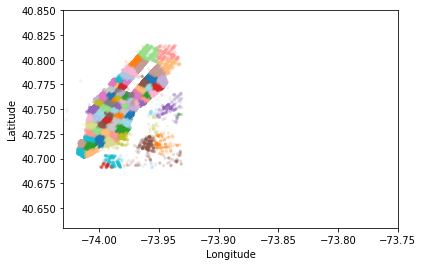

In [49]:
N = 100000 # number of sample rows in plots

fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], s=10, lw=0,
           c=train.pickup_cluster[:N].values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Gaussian mixture models
### Estimate Maximization


In [50]:
import sklearn.mixture

In [52]:
#EM

sample_ind = np.random.permutation(len(coords))[:500000]
gaussian_train = sklearn.mixture.GaussianMixture(n_components=100).fit(coords[sample_ind])

In [53]:
gaussian_train

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=100, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [54]:
train.loc[:, 'gauss_pickup_cluster'] = gaussian_train.predict(train[['pickup_latitude', 'pickup_longitude']])
train.loc[:, 'gauss_dropoff_cluster'] = gaussian_train.predict(train[['dropoff_latitude', 'dropoff_longitude']])
test.loc[:, 'gauss_pickup_cluster'] = gaussian_train.predict(test[['pickup_latitude', 'pickup_longitude']])
test.loc[:, 'gauss_dropoff_cluster'] = gaussian_train.predict(test[['dropoff_latitude', 'dropoff_longitude']])

In [55]:
train.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pick_datehour,distance,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,pickup_cluster,dropoff_cluster,gauss_pickup_cluster,gauss_dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,17,1.498521,0.000729,0.015592,-0.015973,0.009795,47,19,23,53
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,0,1.805507,0.004908,-0.013535,0.025072,-0.016978,99,53,35,86
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,19,1.485498,0.037656,-0.025818,0.042493,-0.038355,92,94,96,54
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,13,1.188588,-0.013249,0.038529,-0.011236,0.028031,66,8,87,63
5,id0801584,2,2016-01-30 22:01:40,6,-73.982857,40.742195,-73.992081,40.749184,N,443,...,22,1.098942,0.006572,-0.009488,0.014210,-0.000794,11,27,89,12


# 1.2.e Indivisual feature visualization

- boxplot
- histogram
- jointplot

# y value = % of value

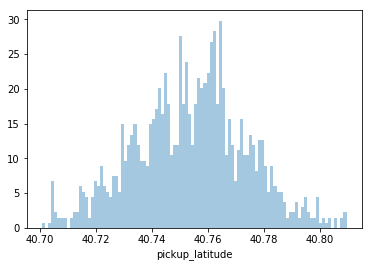

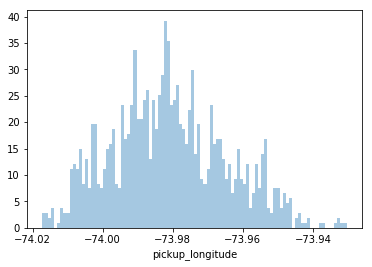

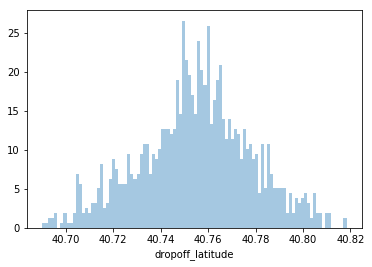

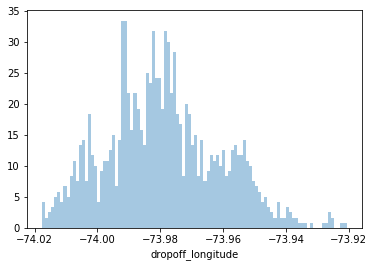

In [39]:
#taxi location latitude, longitude distribution
ax1 = sns.distplot(train["pickup_latitude"], bins = 100, kde=False, norm_hist=True);
plt.xlabel('pickup_latitude')
plt.show()

ax2 = sns.distplot(train["pickup_longitude"], bins = 100, kde=False, norm_hist=True);
plt.xlabel('pickup_longitude')
plt.show()

ax3 = sns.distplot(train["dropoff_latitude"], bins = 100, kde=False, norm_hist=True);
plt.xlabel('dropoff_latitude')
plt.show()

ax4 = sns.distplot(train["dropoff_longitude"], bins = 100, kde=False, norm_hist=True);
plt.xlabel('dropoff_longitude')
plt.show()

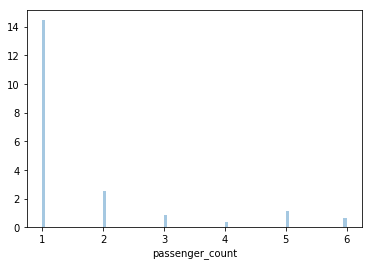

In [40]:
#passenger count
ax1 = sns.distplot(train["passenger_count"], bins = 100, kde=False, norm_hist=True);
plt.xlabel('passenger_count')
plt.show()

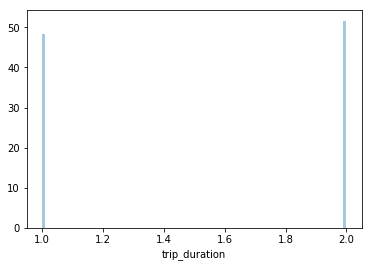

In [41]:
#duration
ax1 = sns.distplot(train["vendor_id"], bins=100, kde=False, norm_hist=True);
plt.xlabel('trip_duration')
plt.show()

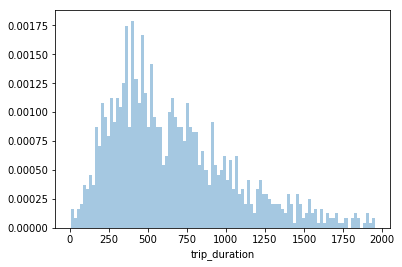

In [42]:
#duration
ax1 = sns.distplot(train["trip_duration"], bins=100, kde=False, norm_hist=True);
plt.xlabel('trip_duration')
plt.show()

In [49]:
# #pick month boxplot
# ax1 = sns.boxplot(train["pick_dayofmonth"],  train["trip_duration"], palette= 'Set2')
# ax2 = sns.swarmplot(train["pick_dayofmonth"],  train["trip_duration"], color="0.25", alpha=.5)
# plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


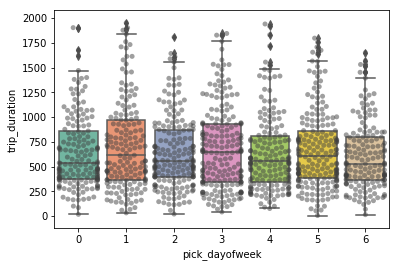

In [50]:
#pick day of week boxplot
ax1 = sns.boxplot(train["pick_dayofweek"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_dayofweek"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()
ax3 = sns.jointplot(train['pick_dayofweek'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


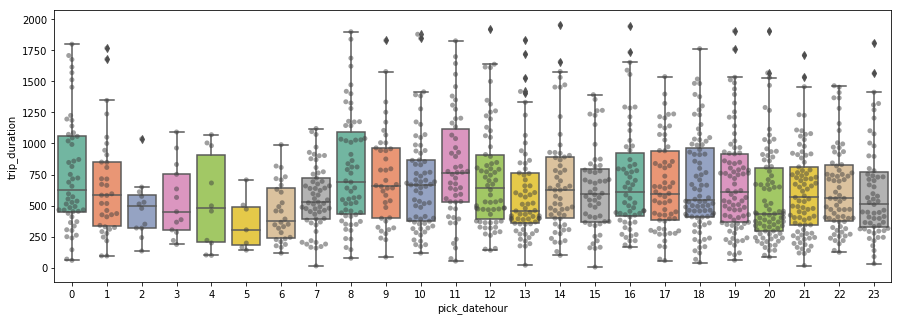

In [51]:
#pick hours boxplot
fig = plt.figure(figsize=(15,5))
ax1 = sns.boxplot(train["pick_datehour"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_datehour"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()
ax3 = sns.jointplot(train['pick_datehour'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


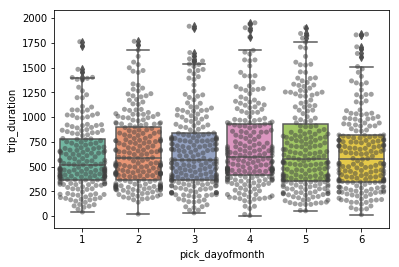

In [52]:
#pick month boxplot
ax1 = sns.boxplot(train["pick_dayofmonth"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["pick_dayofmonth"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()
ax3 = sns.jointplot(train['pick_dayofmonth'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


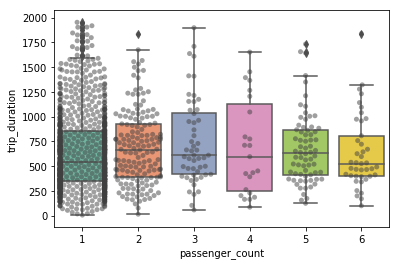

In [53]:
#pick passenger count boxplot
ax1 = sns.boxplot(train["passenger_count"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["passenger_count"],  train["trip_duration"],  color="0.25", alpha=.5)
plt.show()

ax3 = sns.jointplot(train['passenger_count'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


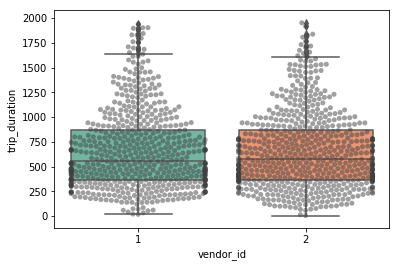

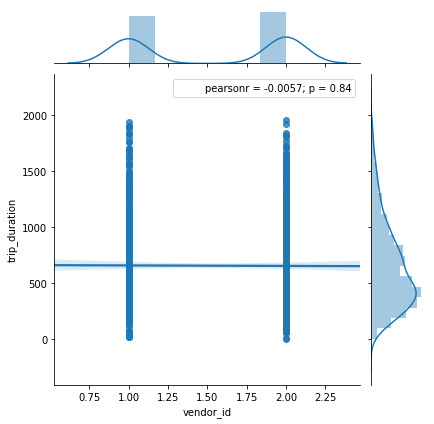

In [58]:
#pick vendor id boxplot
ax1 = sns.boxplot(train["vendor_id"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["vendor_id"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()

ax3 = sns.jointplot(train['vendor_id'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


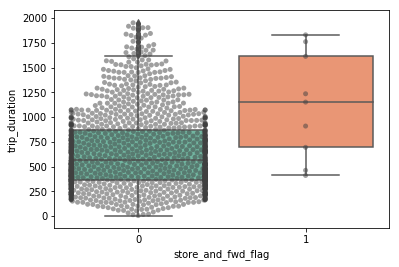

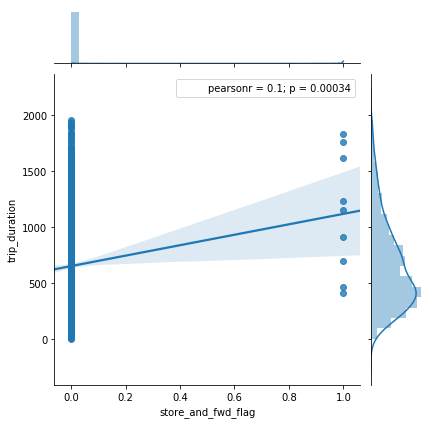

In [74]:
#pick vendor id boxplot
ax1 = sns.boxplot(train["store_and_fwd_flag"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["store_and_fwd_flag"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()

ax3 = sns.jointplot(train['store_and_fwd_flag'], train['trip_duration'], kind = 'reg')
plt.show()

/home/jk/enter/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


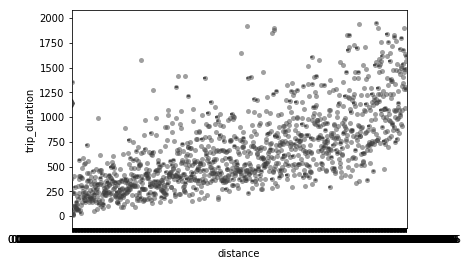

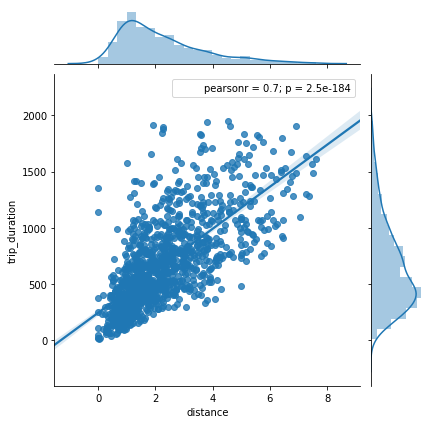

In [59]:
 ## distance와 trip_duration의 jointplot
ax1 = sns.boxplot(train["distance"],  train["trip_duration"], palette= 'Set2')
ax2 = sns.swarmplot(train["distance"],  train["trip_duration"], color="0.25", alpha=.5)
plt.show()
    
ax1 = sns.jointplot(train['distance'], train['trip_duration'], kind = 'reg')
plt.show()

# 1.2.f Map Visualization

- locate data onto NYC map (pickup location)

In [57]:
# interactive map visualization
# pick location and count data on the map
#center location
center=[np.mean(train['pickup_latitude']), np.mean(train['pickup_longitude'])]

m = folium.Map(location = center, zoom_start=10, tiles = 'stamentoner')

marker_cluster = MarkerCluster(
    name='1000 clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)

for i in range(len(train)):
    location1=[train.iloc[i, 5], train.iloc[i, 4]]
    folium.CircleMarker(
        location=location1,
        radius=1,
        color = "blue"
      ).add_to(m)
    marker = folium.Marker(location=location1)
    marker_cluster.add_child(marker)
    marker_cluster.add_to(m)
    
m

# 1.3 EDA Interpretation & conclusion

# 2. Feature Selection

In [107]:
train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_dayofweek,pick_dayofmonth,pick_datehour,distance,pickup_pca0,pickup_pca1,dropoff_pca0,dropoff_pca1,pickup_cluster,dropoff_cluster
100879,id0673821,2,2016-03-19 20:53:44,2,-73.990944,40.732998,-73.944931,40.774727,0,1467,5,3,20,6.045803,-0.023544,0.002960,0.036897,0.017293,32,17
203245,id3465534,2,2016-04-25 14:31:34,2,-73.982185,40.752148,-73.988281,40.742992,0,331,0,4,14,1.140205,-0.002798,-0.000652,-0.013796,-0.000499,94,86
1133010,id1354600,1,2016-05-04 16:35:10,1,-73.969307,40.760986,-73.978966,40.747524,0,357,2,5,16,1.703721,0.011776,0.004966,-0.004789,0.004618,3,88
1102498,id0962434,1,2016-01-14 04:30:56,1,-73.981865,40.758327,-73.991219,40.750141,0,221,3,1,4,1.203892,0.002479,-0.003884,-0.009563,-0.006966,30,31
557489,id1750356,2,2016-06-07 08:09:01,6,-73.959686,40.808899,-73.975456,40.764610,0,1838,1,6,8,5.100504,0.056727,-0.014207,0.011285,-0.002154,73,93


# 3. Modeling

### data type manipulation
- categorical data convert encoding

In [38]:
# train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
# test['store_and_fwd_flag'] = 1 * (test.store_and_fwd_flag.values == 'Y')

In [56]:
# train = pd.get_dummies(train, columns=["store_and_fwd_flag"], prefix='store_and_fwd_flag')
# test = pd.get_dummies(test, columns=["store_and_fwd_flag"], prefix='store_and_fwd_flag')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236151 entries, 0 to 1458643
Data columns (total 15 columns):
id                    1236151 non-null object
vendor_id             1236151 non-null int64
pickup_datetime       1236151 non-null datetime64[ns]
passenger_count       1236151 non-null int64
pickup_longitude      1236151 non-null float64
pickup_latitude       1236151 non-null float64
dropoff_longitude     1236151 non-null float64
dropoff_latitude      1236151 non-null float64
store_and_fwd_flag    1236151 non-null object
trip_duration         1236151 non-null int64
trip_sec              1236151 non-null int64
pick_dayofweek        1236151 non-null int64
pick_dayofmonth       1236151 non-null int64
pick_datehour         1236151 non-null int64
distance              1236151 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(7), object(2)
memory usage: 150.9+ MB


In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 13 columns):
id                    625134 non-null object
vendor_id             625134 non-null int64
pickup_datetime       625134 non-null datetime64[ns]
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null object
pick_dayofweek        625134 non-null int64
pick_dayofmonth       625134 non-null int64
pick_datehour         625134 non-null int64
distance              625134 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 62.0+ MB


In [44]:
X_train = train.drop(labels = ["id", "trip_duration", "pickup_datetime", 'store_and_fwd_flag', "trip_sec"], axis=1)
Y_train = train["trip_duration"]
X_test  = test.drop(labels = ["id", "pickup_datetime",'store_and_fwd_flag'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1236151, 10), (1236151,), (625134, 10))

In [45]:
# X_test1  = test1.drop(labels = ["id", "pickup_datetime", ], axis=1).copy()
# X_test1.shape

In [37]:
# from sklearn.model_selection import KFold # import KFold
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# print(kf) 

In [38]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# from collections import Counter

# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# sns.set(style='white', context='notebook', palette='deep')

In [39]:
# cross_val_score(estimator= lasso, X= X_train, y = Y_train, scoring = "accuracy", cv = "kFold", n_jobs=4)

In [40]:
# for train_index, test_index in kf.split(X):
#  print('TRAIN:', train_index, 'TEST:', test_index)
#  X_train, X_test = X[train_index], X[test_index]
#  y_train, y_test = y[train_index], y[test_index]


In [46]:
import statsmodels.api as sm
from sklearn.datasets import make_blobs

OLS_model = sm.OLS(Y_train, X_train).fit()
print(OLS_model.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 7.929e+05
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:01:05   Log-Likelihood:            -8.7525e+06
No. Observations:             1236151   AIC:                         1.750e+07
Df Residuals:                 1236141   BIC:                         1.751e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
vendor_id            -0.8065      0.54

In [47]:
OLS_model.params, OLS_model.tvalues

(vendor_id              -0.806520
 passenger_count         2.699621
 pickup_longitude       62.395189
 pickup_latitude       429.920354
 dropoff_longitude    -574.580837
 dropoff_latitude    -1354.442022
 pick_dayofweek        -11.672138
 pick_dayofmonth        10.189583
 pick_datehour           3.278461
 distance              182.786077
 dtype: float64, vendor_id              -1.488145
 passenger_count        13.099377
 pickup_longitude        3.481502
 pickup_latitude        26.079999
 dropoff_longitude     -31.819021
 dropoff_latitude      -87.214235
 pick_dayofweek        -87.409445
 pick_dayofmonth        66.161386
 pick_datehour          79.082294
 distance             1049.024160
 dtype: float64)

In [53]:
Y_test_OLS = OLS_model.predict(X_test)
Y_test_OLS.head(), len(Y_test_OLS)

sub = pd.DataFrame()
sub['Id'] = test["id"]
sub['trip_duration'] = Y_test_OLS
sub.to_csv('submission_OLS.csv',index=False)

In [58]:
#score(RMSLE) = 0.54618 (850/1257) 67%

In [61]:
X_train_vendor = train.drop(labels = ["id", "vendor_id", "trip_duration", "pickup_datetime", 'store_and_fwd_flag', "trip_sec"], axis=1)
Y_train_vendor = train["trip_duration"]
X_test_vendor  = test.drop(labels = ["id" , "vendor_id", "pickup_datetime",'store_and_fwd_flag'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((1236151, 10), (1236151,), (625134, 10))

In [63]:
OLS_model_vendor = sm.OLS(Y_train_vendor, X_train_vendor).fit()
print(OLS_model_vendor.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                 8.810e+05
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:14:20   Log-Likelihood:            -8.7525e+06
No. Observations:             1236151   AIC:                         1.750e+07
Df Residuals:                 1236142   BIC:                         1.751e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
passenger_count       2.6103      0.19

In [64]:
Y_test_OLS_vendor = OLS_model_vendor.predict(X_test_vendor)
Y_test_OLS_vendor.head(), len(Y_test_OLS_vendor)

sub = pd.DataFrame()
sub['Id'] = test["id"]
sub['trip_duration'] = Y_test_OLS_vendor
sub.to_csv('submission_OLS_vendor.csv',index=False)

In [65]:
#score = 0.54616, 850/1257

In [54]:
Index1 = X_train.columns
print(Index1)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'pick_dayofweek',
       'pick_dayofmonth', 'pick_datehour', 'distance'],
      dtype='object')


In [66]:
model2 = sm.OLS.from_formula("trip_duration ~ distance", data=train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 1.097e+06
Date:                Tue, 06 Mar 2018   Prob (F-statistic):               0.00
Time:                        19:19:01   Log-Likelihood:            -8.7702e+06
No. Observations:             1236151   AIC:                         1.754e+07
Df Residuals:                 1236149   BIC:                         1.754e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    262.0415      0.472    555.330      0.0

In [67]:
Y_model2 = model2.predict(test['distance'])
Y_model2.head(), len(Y_model2)

sub = pd.DataFrame()
sub['Id'] = test["id"]
sub['trip_duration'] = Y_model2
sub.to_csv('submission_model2.csv',index=False)

In [68]:
#score = 0.55410, 867/1256

In [72]:
model2_2 = sm.OLS.from_formula("trip_duration ~ C(vendor_id) + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + C(store_and_fwd_flag) + C(pick_dayofweek) + C(pick_dayofmonth) + C(pick_datehour) + distance + pickup_pca0 + pickup_pca1 + dropoff_pca0 + dropoff_pca1 + C(pickup_cluster) + C(dropoff_cluster) + 0", data=train).fit()
print(model2_2.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     8.901
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          6.14e-136
Time:                        19:58:46   Log-Likelihood:                -8423.8
No. Observations:                1234   AIC:                         1.731e+04
Df Residuals:                    1003   BIC:                         1.849e+04
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(vendor_id)[1]     

In [84]:
Y_test2 = model2.predict(X_test1)
Y_test2.head(), len(Y_test2)

(0     749.142025
 1     856.959467
 2     573.372417
 3    1313.131172
 4     469.739026
 dtype: float64, 625134)

In [85]:
sub = pd.DataFrame()
sub['Id'] = test1["id"]
sub['trip_duration'] = Y_test2
sub.to_csv('submission_model2_2.csv',index=False)

In [ ]:
#score(RMSEL) = 0.54213

In [106]:
Y_test2_3_1 = model2_3_1.predict(X_test1)
Y_test2_3_1.head(), len(Y_test2_3_1)
sub = pd.DataFrame()
sub['Id'] = test1["id"]
sub['trip_duration'] = Y_test2_3_1
sub.to_csv('submission_model2_3_1.csv',index=False)

In [105]:
model2_3_1 = sm.OLS.from_formula("trip_duration ~ C(vendor_id) + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + C(store_and_fwd_flag) + C(pick_dayofweek) + C(pick_dayofmonth) + C(pick_datehour) + distance + 0", data=train).fit()
print(model2_3_1.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     37.80
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          2.07e-187
Time:                        20:39:47   Log-Likelihood:                -8587.3
No. Observations:                1234   AIC:                         1.726e+04
Df Residuals:                    1191   BIC:                         1.748e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(vendor_id)[1]     

In [86]:
model2_3 = sm.OLS.from_formula("trip_duration ~ C(vendor_id) + passenger_count + pickup_longitude + pickup_latitude + dropoff_longitude + dropoff_latitude + C(store_and_fwd_flag) + C(pick_dayofweek) + C(pick_dayofmonth) + C(pick_datehour) + distance + pickup_pca0 + pickup_pca1 + dropoff_pca0 + dropoff_pca1 + pickup_cluster + dropoff_cluster + 0", data=train).fit()
print(model2_3.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     36.09
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          4.26e-186
Time:                        20:19:48   Log-Likelihood:                -8586.7
No. Observations:                1234   AIC:                         1.726e+04
Df Residuals:                    1189   BIC:                         1.749e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(vendor_id)[1]     

In [87]:
Y_test2_3 = model2_3.predict(X_test1)
Y_test2_3.head(), len(Y_test2_3)
sub = pd.DataFrame()
sub['Id'] = test1["id"]
sub['trip_duration'] = Y_test2_3
sub.to_csv('submission_model2_3.csv',index=False)

In [88]:
#score(RMSLE) = 0.54766

In [67]:
model2_1 = sm.OLS.from_formula("trip_duration ~ X_train", data=train).fit()
print(model2_1.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          1.85e-178
Time:                        19:47:00   Log-Likelihood:                -8669.8
No. Observations:                1234   AIC:                         1.737e+04
Df Residuals:                    1220   BIC:                         1.744e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.0435      5.187     -0.587      

In [130]:
Y_test = model2.predict(X_test)
Y_test.head(), len(Y_test)

(203245    1178.080617
 620104     361.238682
 437782     278.841313
 84434      277.984098
 558155     392.230070
 dtype: float64, 544)

In [131]:
print("TSS = ", model2.uncentered_tss)
print("ESS = ", model2.mse_model)
print("RSS = ", model2.ssr)
print("ESS + RSS = ", model2.mse_model + model2.ssr)
print("R squared = ", model2.rsquared)

TSS =  719554019.0
ESS =  7326123.00582538
RSS =  91490034.43885678
ESS + RSS =  98816157.44468217
R squared =  0.5100400899586734


In [132]:
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
vendor_id,3.467636e+04,1.0,0.462402,4.966326e-01
passenger_count,5.646874e+04,1.0,0.752998,3.856992e-01
pickup_longitude,1.830511e+04,1.0,0.244095,6.213532e-01
pickup_latitude,2.314520e+05,1.0,3.086363,7.920193e-02
dropoff_longitude,3.270506e+03,1.0,0.043611,8.346130e-01
dropoff_latitude,8.815414e+05,1.0,11.755166,6.269844e-04
store_and_fwd_flag,2.200338e+05,1.0,2.934103,8.698089e-02
pick_dayofweek,4.127544e+05,1.0,5.503991,1.913251e-02
pick_dayofmonth,4.146226e+05,1.0,5.528903,1.886320e-02
pick_datehour,1.760408e+03,1.0,0.023475,8.782545e-01


In [133]:
# X_train2 = pd.DataFrame(scale(X_train), columns = Index1)
# X_train2.head(), len(X_train2)

In [134]:
# len(Y_train)

In [135]:
model3 = sm.OLS.from_formula("Y_train ~ scale(X_train)", data=train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Y_train   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          1.85e-178
Time:                        01:05:41   Log-Likelihood:                -8669.8
No. Observations:                1234   AIC:                         1.737e+04
Df Residuals:                    1220   BIC:                         1.744e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            657.1045      7

In [136]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

In [137]:
model4 = sm.OLS.from_formula("trip_duration ~ robust_scale(X_train)", data=train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     97.69
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          1.85e-178
Time:                        01:05:47   Log-Likelihood:                -8669.8
No. Observations:                1234   AIC:                         1.737e+04
Df Residuals:                    1220   BIC:                         1.744e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [90]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize

X_train2 = normalize(X_train)

In [98]:
X_test2 = normalize(X_test1)

In [99]:
len(X_test2)

625134

In [91]:
X_train2

array([[ 1.57838783e-02,  1.57838783e-02, -5.83932026e-01, ...,
         1.36472271e-04,  2.52542052e-01,  1.34162965e-01],
       [ 1.14105786e-02,  1.14105786e-02, -4.22089769e-01, ...,
        -2.84826002e-06,  5.36297192e-01,  4.90654878e-01],
       [ 6.69513429e-03,  6.69513429e-03, -4.95234444e-01, ...,
         3.09195531e-05,  2.00854029e-02,  5.89171818e-01],
       ...,
       [ 1.37778688e-02,  6.88893439e-03, -5.09674031e-01, ...,
         9.18857430e-05,  4.13336063e-01,  3.72002457e-01],
       [ 7.30710817e-03,  7.30710817e-03, -5.40626103e-01, ...,
        -7.28316715e-06,  4.23812274e-01,  2.33827461e-01],
       [ 1.43650788e-02,  7.18253941e-03, -5.31438597e-01, ...,
        -8.34033792e-05,  0.00000000e+00,  4.88412680e-01]])

In [92]:
model5_1 = sm.OLS.from_formula("trip_duration ~ X_train2", data=train).fit()
print(model5_1.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     89.68
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          4.93e-176
Time:                        20:23:48   Log-Likelihood:                -8673.2
No. Observations:                1234   AIC:                         1.738e+04
Df Residuals:                    1219   BIC:                         1.745e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      556.7370    327.307      1.701   

In [93]:
model5 = sm.OLS.from_formula("trip_duration ~ X_train2", data=train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     89.68
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          4.93e-176
Time:                        20:23:48   Log-Likelihood:                -8673.2
No. Observations:                1234   AIC:                         1.738e+04
Df Residuals:                    1219   BIC:                         1.745e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      556.7370    327.307      1.701   

In [94]:
model6 = sm.OLS.from_formula("trip_duration ~ scale(X_train2)", data=train).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:          trip_duration   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     89.68
Date:                Mon, 05 Mar 2018   Prob (F-statistic):          4.93e-176
Time:                        20:23:49   Log-Likelihood:                -8673.2
No. Observations:                1234   AIC:                         1.738e+04
Df Residuals:                    1219   BIC:                         1.745e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             657.1045    

In [96]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 17 columns):
vendor_id             625134 non-null int64
passenger_count       625134 non-null int64
pickup_longitude      625134 non-null float64
pickup_latitude       625134 non-null float64
dropoff_longitude     625134 non-null float64
dropoff_latitude      625134 non-null float64
store_and_fwd_flag    625134 non-null int64
pick_dayofweek        625134 non-null int64
pick_dayofmonth       625134 non-null int64
pick_datehour         625134 non-null int64
distance              625134 non-null float64
pickup_pca0           625134 non-null float64
pickup_pca1           625134 non-null float64
dropoff_pca0          625134 non-null float64
dropoff_pca1          625134 non-null float64
pickup_cluster        625134 non-null int32
dropoff_cluster       625134 non-null int32
dtypes: float64(9), int32(2), int64(6)
memory usage: 76.3 MB


In [103]:
X_test3 = scale(X_test2)

NameError: name 'scale' is not defined

In [104]:
Y_test5 = model5.predict(X_test)
Y_test5.head(), len(Y_test5)
sub = pd.DataFrame()
sub['Id'] = test1["id"]
sub['trip_duration'] = Y_test5
sub.to_csv('submission_model5.csv',index=False)

PatsyError: Number of rows mismatch between data argument and X_train2 (544 versus 1234)
    trip_duration ~ X_train2
                    ^^^^^^^^

In [143]:
result6_1 = sm.OLS.from_formula("trip_duration ~ scale(X_train2)", data=train).fit_regularized(alpha=0.01, L1_wt=0)
result6_1

In [144]:
result6_2 = sm.OLS.from_formula("trip_duration ~ scale(X_train2)", data=train).fit_regularized(alpha=0.01, L1_wt=1)
result6_2

In [145]:
result6_3 = sm.OLS.from_formula("trip_duration ~ scale(X_train2)", data=train).fit_regularized(alpha=0.01, L1_wt=0.5)
result6_3

In [221]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [222]:
Y_test.shape, X_test.shape, Y_train.shape, X_train.shape, 

((544,), (544, 11), (1234,), (1234, 11))

In [224]:
Y_test = model2.predict(X_test)
Y_test.head(), len(Y_test)

(203245    1163.862951
 620104     342.687858
 437782     282.015555
 84434      265.717348
 558155     389.443627
 dtype: float64, 544)

In [225]:
Y_train1 = model2.predict(X_train)
Y_train1.head(), len(Y_train1)

(100879     1280.651925
 203245      507.486881
 1133010     603.554269
 1102498     456.396830
 557489     1293.770425
 dtype: float64, 1234)

In [68]:
# rmsle(Y_train, Y_train1)

In [182]:
from sklearn.metrics import mean_squared_error

In [183]:
# mean_squared_error(Y_train, Y_test) 

In [66]:
import statsmodels


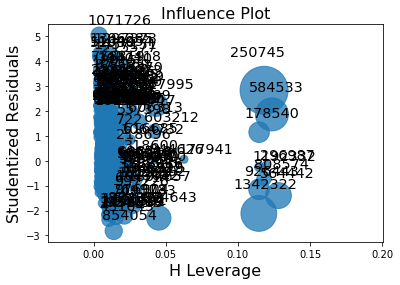

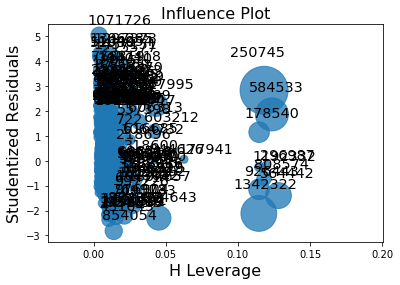

In [67]:
#influence plot
statsmodels.graphics.regressionplots.influence_plot(model2, criterion='cooks')

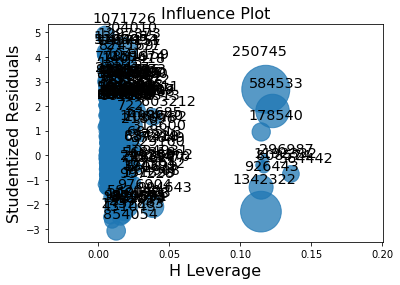

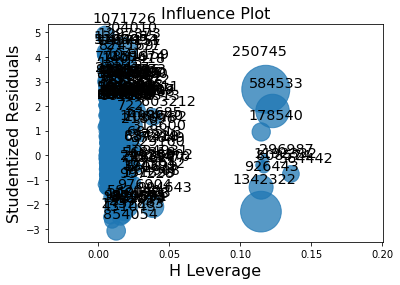

In [69]:
#influence plot
statsmodels.graphics.regressionplots.influence_plot(model6, criterion='cooks')

In [79]:

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [80]:
Y_test = OLS_model.predict(X_test)
Y_test.head(), len(Y_test)

ValueError: shapes (2,2) and (11,) not aligned: 2 (dim 1) != 11 (dim 0)

# model validation score

# RMSLE

In [70]:
from sklearn.metrics import mean_squared_error

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [155]:
Y_train1 = OLS_model.predict(X_train)
Y_train1.head(), len(Y_train1), rmsle(Y_train, Y_train1)

(100879     1285.174817
 203245      507.305781
 1133010     606.051511
 1102498     453.519926
 557489     1288.112839
 dtype: float64, 1234, 272.69107745791587)

In [72]:
rmsle(Y_train, Y_train1)

272.69107745791587

# kaggle data submission

In [169]:
# sub = pd.DataFrame()
# sub['Id'] = test["id"]
# sub['trip_duration'] = Y_test
# sub.to_csv('submission_sample.csv',index=False)

# ridge

In [62]:

>>>
>>> from sklearn.linear_model import Ridge
>>> import numpy as np

clf = Ridge(alpha=1.0)

In [63]:
clf.fit(X_train, Y_train) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
from sklearn.linear_model import Ridge
    #Fit the model
ridgereg = Ridge(normalize=True)
ridgereg.fit(X_train, Y_train)
y_pred = ridgereg.predict(X_test)
    

In [74]:
len(y_pred)

544

In [ ]:


    #Return the result in pre-defined format
rss = sum((y_pred - Y_train)**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)
    

(100879     1246.099331
 203245      560.923062
 1133010     714.240959
 1102498     227.111347
 557489     1369.188706
 dtype: float64, 1234)

254.67625658694774

In [87]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
kmeans.predict([[0, 0], [4, 4]])
kmeans.cluster_centers_


array([[1., 2.],
       [4., 2.]])

In [92]:
KMeans.fit(X, y=None)

TypeError: fit() missing 1 required positional argument: 'X'

# leverage

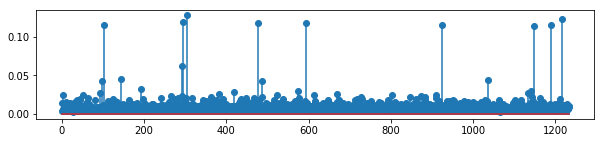

In [110]:
influence = model2.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

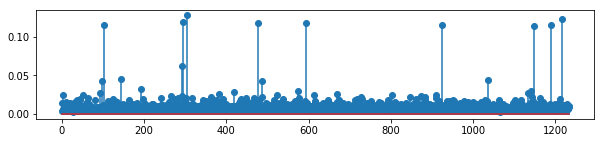

In [111]:
influence = model3.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

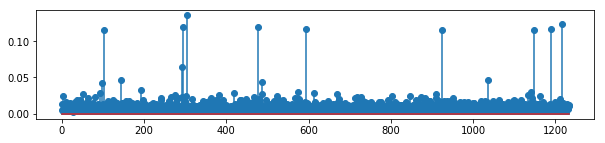

In [112]:
influence = model5.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

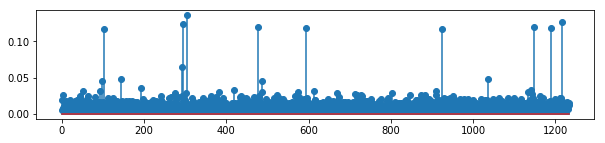

In [113]:
influence = model6.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()